<a href="https://colab.research.google.com/github/MaddalenaDona/Possible-counter-intuitive-impact-of-local-vaccine-mandates-for-vaccine-preventable-infectious-disea/blob/main/Figure9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from numpy.core.function_base import linspace
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.linalg import solve_triangular
from scipy import optimize


def matrix(n,p): #function that creates the matrix of the coefficients of the triangular system (Th 2.2 Andresson and Britton)
#note: if we fix n=2, for example, then we need to compute P_0,P_1,P_2 so the system has dimension n+1
  A=np.zeros((n+1,n+1))
  for l in range(n+1): #row
    for k in range(l+1): #column
      #p=p_L is the local infection probability
      A[l][k]=(math.comb(n-k,l-k))/((1-p)**((n-l)*(k+1))) #coefficient as in formula of Theorem 2.2 of Andresson & Britton, adapted to our case
  return(A)

def rhs(n): #function that creates a vector with the right hand side of the triangular system
  R=np.zeros(n+1) #the right hand side is a vector of dimension n+1
  for l in range(n+1):
    R[l]=math.comb(n,l)
  return(R)


def solve(n,p):
  P=solve_triangular(matrix(n,p), rhs(n), lower=True) #vector of probabilities
  return P

Text(0.5, 1.0, 'Comparison of $p_{wm}$')

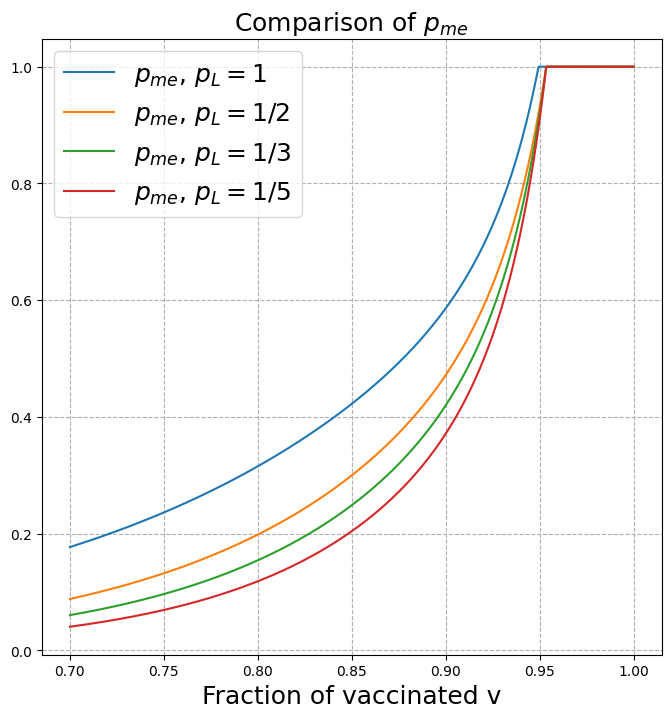

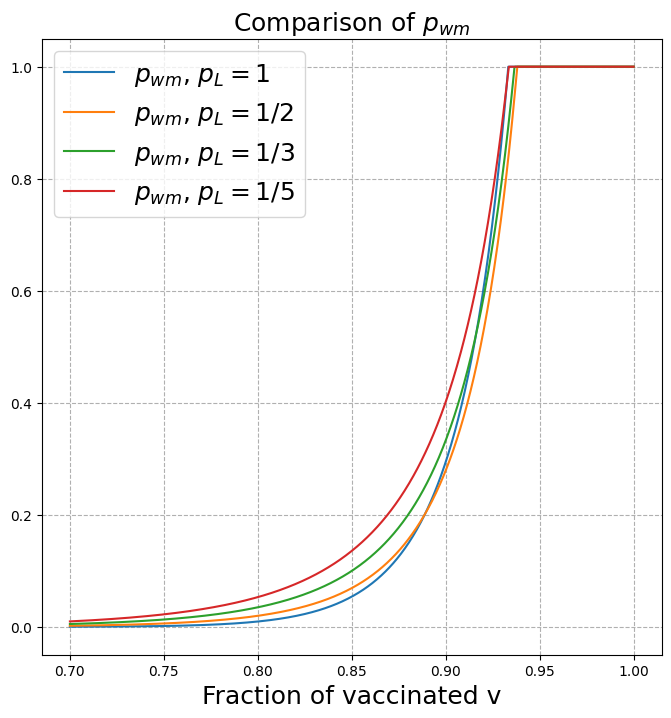

In [4]:
#confronting the cases $p_L=1, 1/2, 1/3$ and $1/5$
def g(z, v, pi, lambdag,p): #finds Barq
  u=(1-v)/(1-pi)
  esp=np.exp(-lambdag*(1-v)*(1-z))
  Q=[]
  T=0
  for l in range(n+1): #l=0,..,n
    sum=0
    Q.append(solve(l,p)) #$Q[0]=[P^0_0]; Q[1]=[P^1_0, P^1_1], Q[2]=[P^2_0,P^2_1,P^2_2]$,..
    for j in range(l+1): #j=0,..,l
      #now I create the elements of the inner sum and add them up
      sum+=Q[l][j]*(esp**(j+1)) #Q[j] is a vector of probabilities of length j+1
    T+=math.comb(n,l)*(u**l)*((1-u)**(n-l))*sum
  z=T
  return z


def f (z,v,pi, lambdag):
  x=np.exp(-lambdag*(1-v)*(1-z))
  return x


def fun1(x, v, pi): #$p_L=1$
  u=(1-v)/(1-pi)
  z=x*(x*u+1-u)**(n)
  return np.exp(-lambdag1*(1-v)*(1-z))

def fun(x, v): #$p_L=1$
  y=x*(x*(1-v)+v)**(n)
  return y

v=np.linspace(0.7,1,1000)
pi=0.5 #fraction of schools with a vaccine mandate
n=24 #number of unvaccinated in a class-1
R0=15 #basic reproduction number
lambdag1=(R0**2)/(R0+n) #$\lambda_G$ value corresponding to $p_L=1$
lambdag2=(R0**3)/(R0**2+n/2+R0*n/2) #$\lambda_G$ value corresponding to $p_L=1/2$
lambdag3=(R0**3)/(R0**2+2*n/3+R0*n/3) #$\lambda_G$ value corresponding to $p_L=1/3$
lambdag5=(R0**3)/(R0**2+4*n/5+R0*n/5) #$\lambda_G$ value corresponding to $p_L=1/5$

#$p_L=1$
X=[]
X1=[]
Y=[]

#$p_L=1/2$
A=[]
B=[]
C=[]

#$p_L=1/3$
D=[]
E=[]
F=[]

#$p_L=1/5$
G=[]
H=[]
I=[]

for i in range(len(v)):

  #$p_L=1$:
  X.append(optimize.fixed_point(fun1, 0.4, args=(v[i],pi))) #$p_{me}$
  X1.append(optimize.fixed_point(fun1, 0.4, args=(v[i],0)))
  Y.append(fun(X1[i],v[i])) #$p_{wm}$

  #$p_L=1/2$
  A.append(optimize.fixed_point(g, 0.2, args=(v[i],pi,lambdag2,1/2), xtol=1e-03, maxiter=5000))
  B.append(f(A[i],v[i],pi,lambdag2)) #$p_{me}$
  C.append(optimize.fixed_point(g, 0.2, args=(v[i],0,lambdag2,1/2), xtol=1e-03, maxiter=1000)) #$p_{wm}$

  #$p_L=1/3$
  D.append(optimize.fixed_point(g, 0.2, args=(v[i],pi,lambdag3,1/3), xtol=1e-03, maxiter=5000))
  E.append(f(A[i],v[i],pi,lambdag3)) #$p_{me}$
  F.append(optimize.fixed_point(g, 0.2, args=(v[i],0,lambdag3,1/3), xtol=1e-03, maxiter=1000)) #$p_{wm}$

  #$p_L=1/5$
  G.append(optimize.fixed_point(g, 0.2, args=(v[i],pi,lambdag5,1/5), xtol=1e-03, maxiter=5000))
  H.append(f(A[i],v[i],pi,lambdag5)) #$p_{me}$
  I.append(optimize.fixed_point(g, 0.2, args=(v[i],0,lambdag5,1/5), xtol=1e-03, maxiter=1000)) #$p_{wm}$




plt.figure(figsize=(8,8))
plt.plot(v,X, label=r'$p_{me}$, $p_L=1$')
plt.plot(v,B, label=r'$p_{me}$, $p_L=1/2$')
plt.plot(v,E, label=r'$p_{me}$, $p_L=1/3$')
plt.plot(v,H, label=r'$p_{me}$, $p_L=1/5$')
plt.grid(ls='--')
plt.xlabel('Fraction of vaccinated v', fontsize=18)
plt.legend(fontsize=18)
plt.title('Comparison of $p_{me}$', fontsize=18)


plt.figure(figsize=(8,8))
plt.plot(v,Y, label=r'$p_{wm}$, $p_L=1$')
plt.plot(v,C, label=r'$p_{wm}$, $p_L=1/2$')
plt.plot(v,F, label=r'$p_{wm}$, $p_L=1/3$')
plt.plot(v,I, label=r'$p_{wm}$, $p_L=1/5$')
plt.grid(ls='--')
plt.xlabel('Fraction of vaccinated v', fontsize=18)
plt.legend(fontsize=18)
plt.title('Comparison of $p_{wm}$', fontsize=18)